In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [3]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

Using TensorFlow backend.


'tf'

In [5]:
labels=np.array(labels)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train, labels, test_size = 0.3, random_state = 42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [7]:
x_test.shape

(14252, 784)

In [8]:
x_train = np.array(x_train)
x_train = x_train.reshape((33252,1,28,28))
x_test = np.array(x_test)
x_test = x_test.reshape((14252,1,28,28))

In [9]:
from keras.utils import np_utils
cat_train = np_utils.to_categorical(y_train,13)
cat_test = np_utils.to_categorical(y_test,13)
cat_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
cat_train.shape

(33252, 13)

In [11]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu', data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
from keras.models import model_from_json

In [34]:
history=model.fit(x_train, cat_train, epochs=10, batch_size=200,shuffle=True,validation_data=(x_test, cat_test), verbose=1)

Train on 33252 samples, validate on 14252 samples
Epoch 1/10
33252/33252 [==============================] - 24s 731us/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0550 - val_accuracy: 0.9868
Epoch 2/10
33252/33252 [==============================] - 21s 633us/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0546 - val_accuracy: 0.9881
Epoch 3/10
33252/33252 [==============================] - 22s 656us/step - loss: 0.0530 - accuracy: 0.9839 - val_loss: 0.0514 - val_accuracy: 0.9892
Epoch 4/10
33252/33252 [==============================] - 22s 671us/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0460 - val_accuracy: 0.9900
Epoch 5/10
33252/33252 [==============================] - 23s 688us/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0550 - val_accuracy: 0.9888
Epoch 6/10
33252/33252 [==============================] - 23s 692us/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0501 - val_accuracy: 0.9894
Epoch 7/10
33252/33252 [==============================] 

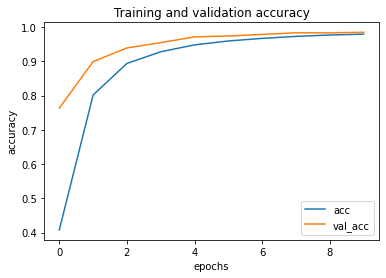

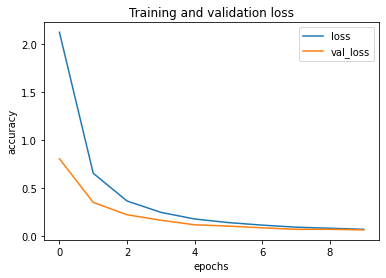

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')

plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation loss')

plt.show()

In [15]:
import tensorflow as tf
y_pred=model.predict_classes(x_test)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

In [16]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes=[0,1,2,3,4,5,6,7,8,9,10,11,12]

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

In [17]:
con_mat_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
1,0.00,0.98,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
2,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0
3,0.00,0.00,0.00,0.97,0.00,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,0.97,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0
5,0.00,0.00,0.00,0.01,0.00,0.97,0.01,0.00,0.00,0.00,0.0,0.0,0.0
6,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,0.0
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.0,0.0,0.0
8,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.98,0.01,0.0,0.0,0.0
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.0,0.0


In [18]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")